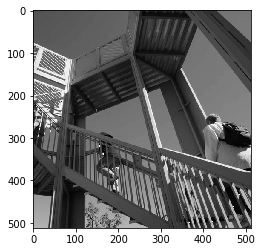

In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


img = misc.ascent()
plt.gray()
plt.imshow(img)

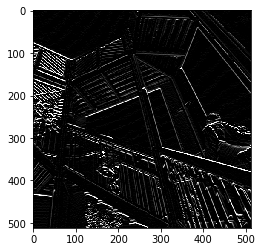

In [2]:
filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# filter = filter.T


features = img.copy()
for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        conv = img[i - 1, j - 1] * filter[0][0]
        conv += img[i - 1, j] * filter[0][1]
        conv += img[i - 1, j + 1] * filter[0][2]
        conv += img[i, j - 1] * filter[1][0]
        conv += img[i, j] * filter[1][1]
        conv += img[i, j + 1] * filter[1][2]
        conv += img[i + 1, j - 1] * filter[2][0]
        conv += img[i + 1, j] * filter[2][1]
        conv += img[i + 1, j + 1] * filter[2][2]
        
        conv = 0. if min(conv, 255.) < 0 else min(conv, 255.) 
        
        features[i, j] = conv
        
plt.imshow(features)        

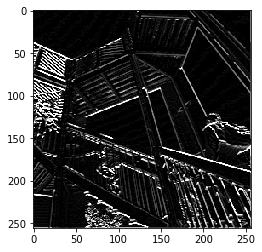

In [3]:
pool_img = np.zeros((img.shape[0] // 2, img.shape[1] // 2))

for i in range(0, features.shape[0], 2):
    for j in range(0, features.shape[1], 2):
        pool_img[i // 2, j // 2] = np.max(features[i:i+2, j:j+2])
        
plt.imshow(pool_img)        

In [26]:
import tensorflow as tf


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.7333 - acc: 0.7650
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.5148 - acc: 0.8241
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4695 - acc: 0.8384
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4427 - acc: 0.8475
Epoch 5/5
10000/10000 [==============================] - 0s 31us/sample - loss: 0.4493 - acc: 0.8448


[0.4493141941547394, 0.8448]

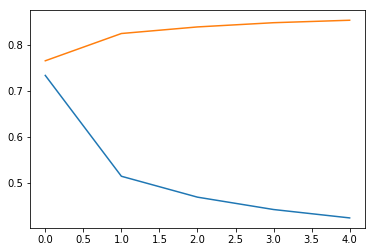

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])

In [17]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 21s 343us/sample - loss: 0.8686 - acc: 0.6840
Epoch 2/5
60000/60000 [==============================] - 21s 344us/sample - loss: 0.5350 - acc: 0.8011
Epoch 3/5
60000/60000 [==============================] - 22s 363us/sample - loss: 0.4646 - acc: 0.8302
Epoch 4/5
60000/60000 [==============================] - 21s 349us/sample - loss: 0.4226 - acc: 0.8470
Epoch 5/5
10000/10000 [==============================] - 1s 118us/sample - loss: 0.3985 - acc: 0.8576


[0.3984528908967972, 0.8576]

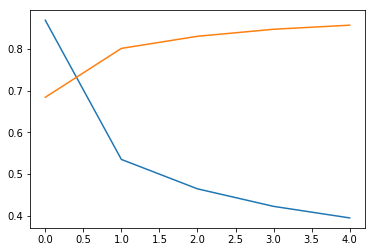

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])

### Here we see the standard graph of loss and accuracy discrepancies.
#### Time to calculate of iteration => +-21s 

In [20]:
#I change number of filter layers to 128
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.8671 - acc: 0.6898
Epoch 2/5
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.5250 - acc: 0.8051
Epoch 3/5
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.4501 - acc: 0.8368
Epoch 4/5
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.4082 - acc: 0.8516
Epoch 5/5
10000/10000 [==============================] - 4s 449us/sample - loss: 0.3964 - acc: 0.8600


[0.3963815446138382, 0.86]

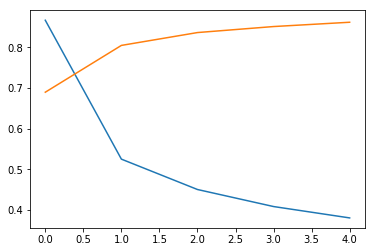

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])

### Here we see the graph when was changed number of filter layers to 128.
#### Time to calculate of iteration was changed => +-117s 
##### We do not observe any special changes in the graph.

In [23]:
#I change optimizer to Adam and Activation to softmax
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(28, (3, 3), activation='softmax'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 25s 423us/sample - loss: 0.5874 - acc: 0.7841
Epoch 2/5
60000/60000 [==============================] - 24s 408us/sample - loss: 0.3986 - acc: 0.8521
Epoch 3/5
60000/60000 [==============================] - 25s 419us/sample - loss: 0.3539 - acc: 0.8692
Epoch 4/5
60000/60000 [==============================] - 25s 410us/sample - loss: 0.3199 - acc: 0.8816
Epoch 5/5
10000/10000 [==============================] - 1s 143us/sample - loss: 0.3201 - acc: 0.8837


[0.3201189524412155, 0.8837]

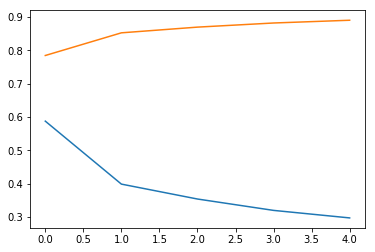

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])

#### Time change to +-25s, but graph got a smoother look!


EXERCISES
===

 - Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
 - Remove the final Convolution. What impact will this have on accuracy or training time?
 - How about adding more Convolutions? What impact do you think this will have? Experiment with it.
 - Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.
 - In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!